<a href="https://colab.research.google.com/github/Meisz00/googlecolab/blob/main/Projek_Final_Banget.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DATA PREPARE**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

import statsmodels.api as sm #Modelling
from scipy.stats import kstest # uji asumsi normalitas
from statsmodels.stats.diagnostic import het_breuschpagan # uji asumsi homoskedastisitas
from statsmodels.stats.stattools import durbin_watson # uji asumsi non-autokorelasi
from statsmodels.stats.outliers_influence import variance_inflation_factor # uji multikolinearitas

In [ ]:
data = pd.read_excel("Data Projek Final Banget.xlsx", sheet_name = "Data Numerik")

In [ ]:
data

,Survey Year,EmploymentStatus,JobTitle,SalaryUSD,YearsWithThisTypeOfJob,Database,Gender
0,2024,Full time employee,Engineer,120000,3,7,1
1,2024,Full time employee,Engineer,145000,10,3,1
2,2024,Full time employee,Engineer,126000,6,5,1
3,2024,Full time employee,Engineer,45000,7,2,1
4,2024,Full time employee,Engineer,153500,4,3,2
...,...,...,...,...,...,...,...
347,2020,Full time employee,Engineer,90000,7,3,1
348,2020,Full time employee,Engineer,105000,20,4,1
349,2020,Full time employee,Engineer,135000,1,2,1
350,2020,Full time employee,Engineer,150000,20,2,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Survey Year             352 non-null    int64 
 1   EmploymentStatus        352 non-null    object
 2   JobTitle                352 non-null    object
 3   SalaryUSD               352 non-null    int64 
 4   YearsWithThisTypeOfJob  352 non-null    int64 
 5   Database                352 non-null    int64 
 6   Gender                  352 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 19.4+ KB


# **UJI OUTLIER**

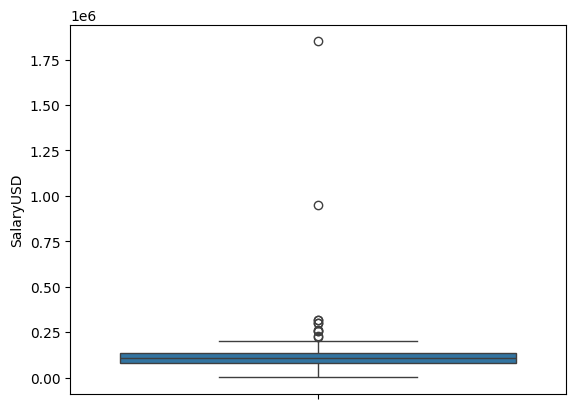

In [ ]:
plt1 = sns.boxplot(data['SalaryUSD'])

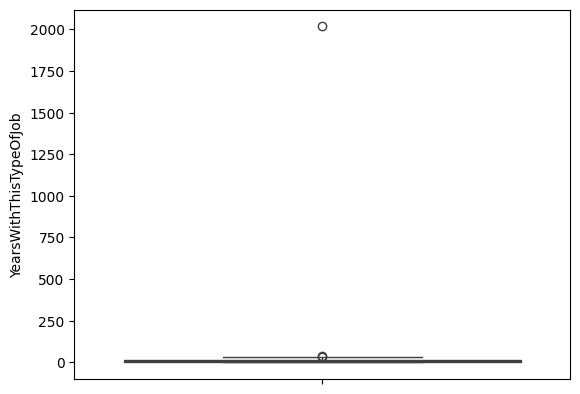

In [ ]:
plt2 = sns.boxplot(data['YearsWithThisTypeOfJob'])

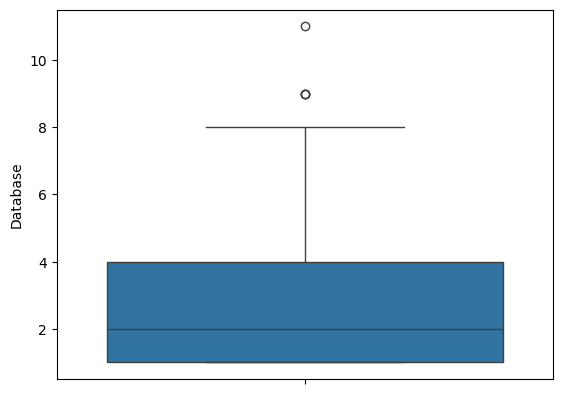

In [ ]:
plt3 = sns.boxplot(data['Database'])

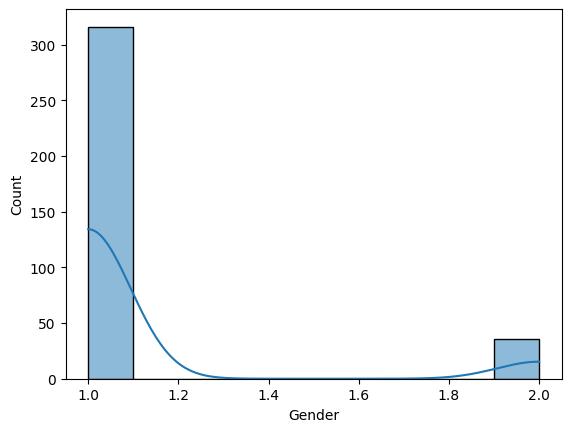

In [ ]:
plt4 = sns.histplot(data['Gender'], kde=True)

In [ ]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    cleaned_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return cleaned_data

# Menghapus outlier dari setiap variabel independen
data = remove_outliers_iqr(data, 'YearsWithThisTypeOfJob')
data = remove_outliers_iqr(data, 'Database')
data = remove_outliers_iqr(data, 'SalaryUSD')

# **DATA BERSIH**

In [ ]:
data

,Survey Year,EmploymentStatus,JobTitle,SalaryUSD,YearsWithThisTypeOfJob,Database,Gender
0,2024,Full time employee,Engineer,120000,3,7,1
1,2024,Full time employee,Engineer,145000,10,3,1
2,2024,Full time employee,Engineer,126000,6,5,1
3,2024,Full time employee,Engineer,45000,7,2,1
4,2024,Full time employee,Engineer,153500,4,3,2
...,...,...,...,...,...,...,...
347,2020,Full time employee,Engineer,90000,7,3,1
348,2020,Full time employee,Engineer,105000,20,4,1
349,2020,Full time employee,Engineer,135000,1,2,1
350,2020,Full time employee,Engineer,150000,20,2,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 337 entries, 0 to 351
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Survey Year             337 non-null    int64 
 1   EmploymentStatus        337 non-null    object
 2   JobTitle                337 non-null    object
 3   SalaryUSD               337 non-null    int64 
 4   YearsWithThisTypeOfJob  337 non-null    int64 
 5   Database                337 non-null    int64 
 6   Gender                  337 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 21.1+ KB


# **X dan Y**

In [ ]:
X = np.array(data[['YearsWithThisTypeOfJob', 'Database', 'Gender']])
Y = np.array(data['SalaryUSD'])

In [ ]:
# Perlu ditambahkan nilai konstanta di kolom pertama
X = sm.add_constant(X)

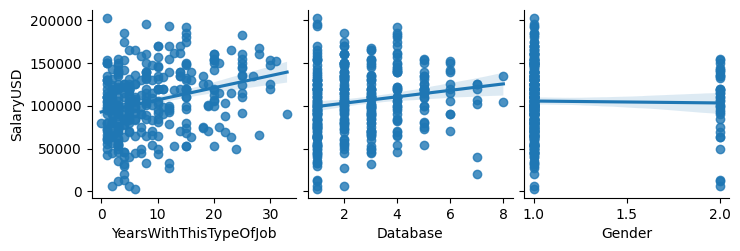

In [ ]:
sns.pairplot(data,
             x_vars = ['YearsWithThisTypeOfJob', 'Database', 'Gender'],
             y_vars = ["SalaryUSD"],
             kind = "reg")

# **KORELASI**

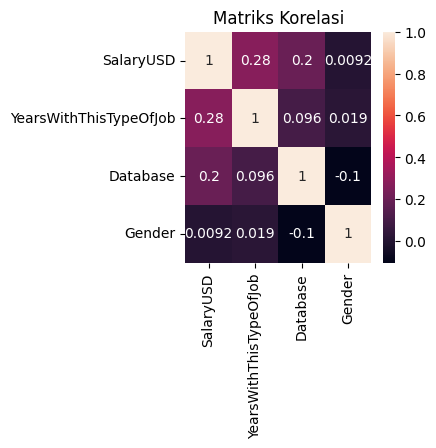

In [ ]:
corr_matrix = data.drop(columns=['Survey Year', 'EmploymentStatus', 'JobTitle']).corr(method='spearman')
plt.figure(figsize=(3,3))
sns.heatmap(corr_matrix, annot=True)
plt.title('Matriks Korelasi');

# **UJI ASUMSI**

In [ ]:
model = sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     12.08
Date:                Mon, 01 Jul 2024   Prob (F-statistic):           1.58e-07
Time:                        12:48:46   Log-Likelihood:                -4011.7
No. Observations:                 337   AIC:                             8031.
Df Residuals:                     333   BIC:                             8047.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.587e+04   8492.161     10.112      0.000    6.92e+04    1.03e+05
x1          1345.1528    260.655      5.161      0.000     832.415    1857.890
x2          3133.2811   1224.521      2.559      0.011     724.509    5542.054
x3          -637.9315   6382.126     -0.100      0.920   -1.32e+04    1.19e+04
==============================================================================
Omnibus:                        0.238   Durbin-Watson:                   1.825
Prob(Omnibus):                  0.888   Jarque-Bera (JB):                0.259
Skew:                          -0.064   Prob(JB):                        0.879
Kurtosis:                       2.954   Cond. No.                         62.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## **UJI NORMALITAS**

In [ ]:
residuals = model.resid

#menggunakan Kolmogorov smirnov
statistic, pvalue = kstest(residuals, 'norm', args=(residuals.mean(), residuals.std()))
print('nilai pvalue sebesar: {:.4f}'.format(pvalue))

nilai pvalue sebesar: 0.7462


## **UJI MULTIKOLINEARITAS**

In [ ]:
VIF = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
print('constant :', round(VIF[0], 4))
print('YearsWithThisTypeOfJob     :', round(VIF[1], 4))
print('Database   :', round(VIF[2], 4))
print('Gender    :', round(VIF[3], 4))

constant : 18.7529
YearsWithThisTypeOfJob     : 1.0098
Database   : 1.0203
Gender    : 1.0106


## **UJI AUTOKORELASI**

In [ ]:
dw_statistic = durbin_watson(model.resid)
print(f'Durbin-Watson statistic: {dw_statistic:.4f}')

Durbin-Watson statistic: 1.8252


## **UJI HETEROSKEDASTISITAS**

In [ ]:
BP, pvalue, _, _ = het_breuschpagan(residuals, X)
print('nilai pvalue sebesar: {:.4f}'.format(pvalue))

nilai pvalue sebesar: 0.2125


# **UJI KOEFISIEN DETERMINASI**

In [ ]:
# Menampilkan R-squared dalam bentuk persentase
r_squared = model.rsquared
r_squared_percentage = r_squared * 100
print(f"Koefisien Determinasi (R-squared) dalam bentuk persentase: {r_squared_percentage:.2f}%")

Koefisien Determinasi (R-squared) dalam bentuk persentase: 9.82%


# **UJI F**

In [ ]:
f_statistic = model.fvalue
f_pvalue = model.f_pvalue
print(f"\nUji F untuk keseluruhan model:")
print(f"F-statistic: {f_statistic:.4f}")
print(f"p-value: {f_pvalue:.4f}")


Uji F untuk keseluruhan model:
F-statistic: 12.0838
p-value: 0.0000


# **UJI T**

In [ ]:
# Menampilkan hasil uji T secara spesifik untuk masing-masing variabel independen
print("\nUji T untuk koefisien regresi:")
print(f"Intercept: t-value = {model.tvalues[0]:.4f}, p-value = {model.pvalues[0]:.4f}")
print(f"YearsWithThisTypeOfJob: t-value = {model.tvalues[1]:.4f}, p-value = {model.pvalues[1]:.4f}")
print(f"Database: t-value = {model.tvalues[2]:.4f}, p-value = {model.pvalues[2]:.4f}")
print(f"Gender: t-value = {model.tvalues[3]:.4f}, p-value = {model.pvalues[3]:.4f}")


Uji T untuk koefisien regresi:
Intercept: t-value = 10.1117, p-value = 0.0000
YearsWithThisTypeOfJob: t-value = 5.1607, p-value = 0.0000
Database: t-value = 2.5588, p-value = 0.0109
Gender: t-value = -0.1000, p-value = 0.9204


# **PERSAMAAN REGRESI**

In [ ]:
print("Koefisien Regresi:")
print(f"Konstanta: {model.params[0]:.4f}")
print(f"YearsWithThisTypeOfJob: {model.params[1]:.4f}")
print(f"Database: {model.params[2]:.4f}")
print(f"Gender: {model.params[3]:.4f}")

Koefisien Regresi:
Konstanta: 85870.4276
YearsWithThisTypeOfJob: 1345.1528
Database: 3133.2811
Gender: -637.9315


In [ ]:
a = model.params[0]
b1 = model.params[1]
b2 = model.params[2]
b3 = model.params[3]
a, b1, b2, b3

(85870.42763112953, 1345.1527558423322, 3133.281058644627, -637.9315397456236)

# **UJI MODEL REGRESI**

In [ ]:
#Pengalaman kerja 10 tahun, menguasai 2 database, laki-laki
x1 = 10
x2 = 2
x3 = 1
predicted_Y = a + b1*x1 + b2*x2 + b3*x3
predicted_Y

104950.58576709648

In [ ]:
#Pengalaman kerja 10 tahun, menguasai 5 database, laki-laki
x1 =  10
x2 = 5
x3 = 1
predicted_Y = a + b1*x1 + b2*x2 + b3*x3
predicted_Y

114350.42894303036

In [ ]:
#Pengalaman kerja 10 tahun, menguasai 2 database, perempuan
x1 = 10
x2 = 2
x3 = 2
predicted_Y = a + b1*x1 + b2*x2 + b3*x3
predicted_Y

104312.65422735085

In [ ]:
#Pengalaman kerja 10 tahun, menguasai 5 database, perempuan
x1 = 10
x2 = 5
x3 = 2
predicted_Y = a + b1*x1 + b2*x2 + b3*x3
predicted_Y

113712.49740328474